In [3]:
# Exercises for Hypothesis Testing homework

In [199]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import viz
from pydataset import data

In [ ]:
# For additional practice, load a different dataset. Also, try to do #1.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?
- Is the website redesign any good?
- Is our television ad driving more sales?

In [27]:
# Formulate the null hypothesis:

null_notation = "0"

null_hypothesis = f"Null Hypothesis: Network latency has not changed since the switch."

alt_hypothesis = "Alt Hypothesis: Network latency has gone up since the switch."

print(null_hypothesis)
print(alt_hypothesis)

Null Hypothesis: Network latency has not changed since the switch.
Alt Hypothesis: Network latency has gone up since the switch.


In [100]:
# Hypotheses regarding the website design.

print("Null Hypothesis $H_{{{0}}}$: Website visits have increased by at least 2% since website redesign")
print("Alt Hypothesis: Website visits haven't changed since website redesign")

Null Hypothesis $H_{{{0}}}$: Website visits have increased by at least 2% since website redesign
Alt Hypothesis: Website visits haven't changed since website redesign


In [29]:
# Is our television ad driving more sales?

print("Null Hypothesis: We had higher average daily sales after the TV ad ran.")
print("Alt Hypothesis: There was no change in average daily sales after the TV ad ran.")

Null Hypothesis: We had higher average daily sales after the TV ad ran.
Alt Hypothesis: There was no change in average daily sales after the TV ad ran.


In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

In [3]:
win = 250
lose = 750

In [25]:
tickets = pd.Series([True] * 250 + [False] * 750)

In [26]:
tickets

0       True
1       True
2       True
3       True
4       True
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [27]:
n = 25
sample_result = tickets.sample(n).mean()
print(f'The percentage of winning tickets in this sample is {sample_result:.2%}')

The percentage of winning tickets in this sample is 12.00%


In [28]:
# The example code said 4 cohorts, but had a range of 5 numbers. I'm assuming they wanted to illustrate 5 "tests", but that was confusing since there are only 4 cohorts...

[tickets.sample(n).mean() for i in range(4)]

[0.36, 0.24, 0.4, 0.2]

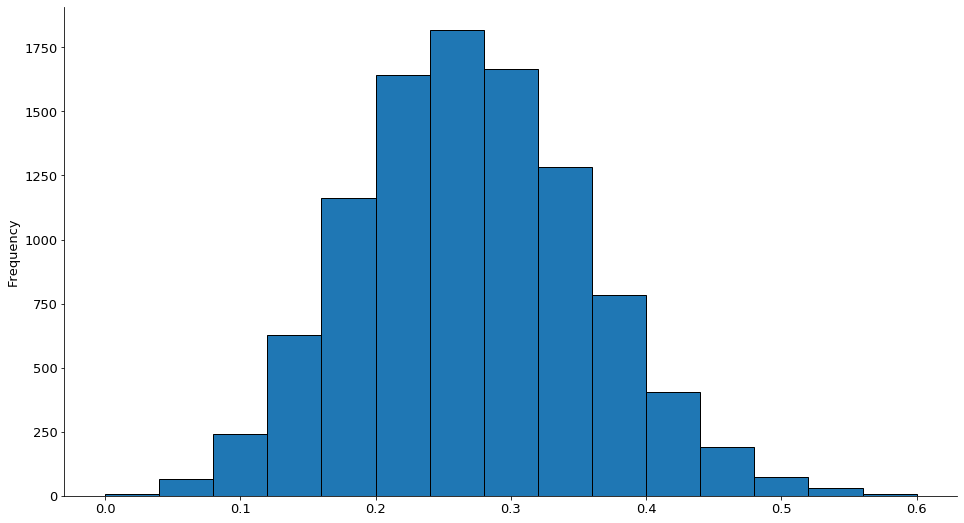

In [31]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for i in range(10_000)])
calculated_winrates.plot.hist(bins = 15)
plt.show()

In [34]:

rolls = pd.DataFrame()
rolls['die1'] = np.random.choice([1, 2, 3, 4, 5, 6], size=10000, 6)
rolls['die2'] = np.random.choice([1, 2, 3, 4, 5, 6], size=10000)
rolls['total'] = rolls.die1 + rolls.die2

In [35]:
rolls

,die1,die2,total
0,1,2,3
1,6,3,9
2,3,2,5
3,2,3,5
4,2,1,3
...,...,...,...
9995,5,2,7
9996,4,2,6
9997,6,3,9
9998,4,5,9


In [70]:
# Realized I was headed the wrong direction with the above code, so created a pandas series instead.
# Generated the histogram based on the series and turns out, I got a fairly normal looking distribution. Cool!

rolls_test = np.random.choice([1, 2, 3, 4, 5, 6], size=(10000, 6))
roll_mean = rolls_test.mean(axis = 1)

In [71]:
roll_mean = pd.Series(rolls_test.mean(axis = 1))

In [72]:
roll_mean

0       1.666667
1       4.333333
2       3.333333
3       5.166667
4       4.500000
          ...   
9995    1.833333
9996    3.166667
9997    2.833333
9998    5.000000
9999    3.500000
Length: 10000, dtype: float64

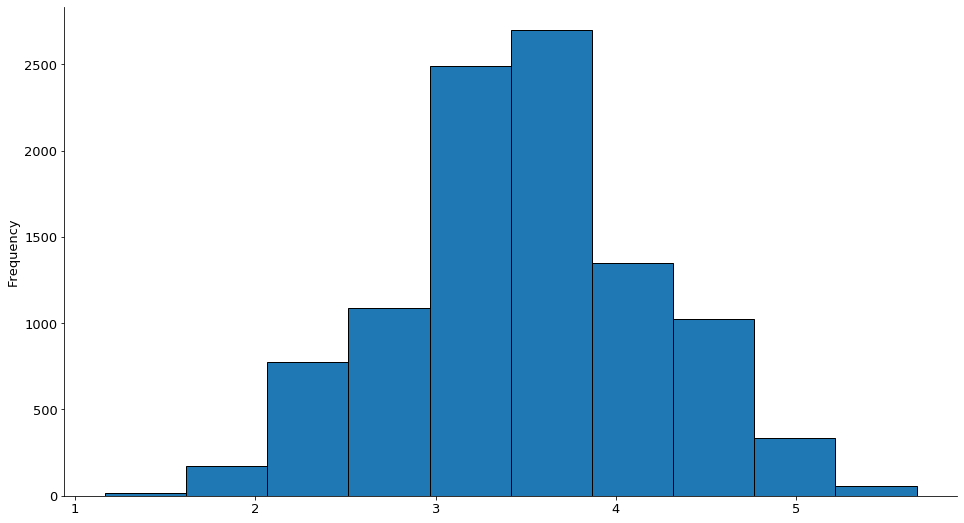

In [73]:
roll_mean.plot.hist()
plt.show()

In [58]:
se = math.sqrt((.25 * .75 / n))

In [62]:
print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calculated_winrates.std())

SE:                 0.0866
sample_means.std(): 0.0864


In [74]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.2)

0.2788499345493136

#### Mini Exercise -- Null + Alternate Hypothesis and Errors

For each of the following scenarios: refine the question, generate a null and alternative hypothesis, and give examples of true positives, true negatives, type I and type II errors.

- Are the average grades in web development vs data science classes different?
- Is there a relationship between how early a student shows up to class and their grade?
- Are web dev or data science students more likely to be coffee drinkers?

In [76]:
# Are the average grades in web development vs data science classes different?

print("Null Hypothesis: The average grades are statistically the same between the two classes.")
print("Alt Hypothesis: The average grades in the data science class are different than the web development class")

H0 Null Hypothesis: The average grades are statistically the same between the two classes.
Alt Hypothesis: The average grades in the data science class are different than the web development class


In [93]:
# Examples of True Positives and Negatives, and Type I and Type II Errors:

# True Negative:
print('We accepted the null hypothesis, and the average score for DS was 89, and the average web dev score was 89.')
print('    ')
# True Positive:
print('We rejected the null hypothesis, and the average score for DS was 89, and the average web dev score was 85.')
print('    ')
# False Negative:
print('We rejected the null hypothesis, and the average score for DS was 89, and the average web dev score was 89. \nThis is a type I error.')
print('    ')
# False Positive: 
print('We accepted the null hypothesis, and the average score for DS was 89, and the average web dev score was 85. \nThis is a type II error.')


We accepted the null hypothesis, and the average score for DS was 89, and the average web dev score was 89.
    
We rejected the null hypothesis, and the average score for DS was 89, and the average web dev score was 85.
    
We rejected the null hypothesis, and the average score for DS was 89, and the average web dev score was 89. 
This is a type I error.
    
We accepted the null hypothesis, and the average score for DS was 89, and the average web dev score was 85. 
This is a type II error.


In [94]:
# Is there a relationship between how early a student shows up to class and their grade?

print("Null Hypothesis: Students who show up early have a higher average grade.")
print("Alt Hypothesis: The average student grade is not effected by showing up early to class.")

Null Hypothesis: Students who show up early have a higher average grade.
Alt Hypothesis: The average student grade is not effected by showing up early to class.


In [95]:
# Examples of True Positives and Negatives, and Type I and Type II Errors:

# True Negative:
print("The average score for early students is 90. The class average is 85.")
print('    ')
# True Positive:
print("The average score for early students is 90. However the class average is also 90.")
print('    ')
# False Negative:
print("We reject the null hypothesis. The average score for early students is 90. However the class average is lower at 85. \nThis is a type I error.")
print('    ')
# False Positive: 
print("We accept the null hypothesis. The average score for early students is 90. However the class average is the same at 90. \nThis is a type II error.")

The average score for early students is 90. The class average is 85.
    
The average score for early students is 90. However the class average is also 90.
    
We reject the null hypothesis. The average score for early students is 90. However the class average is lower at 85. 
This is a type I error.
    
We accept the null hypothesis. The average score for early students is 90. However the class average is the same at 90. 
This is a type II error.


In [96]:
# Are web dev or data science students more likely to be coffee drinkers?
# Short answer, YES, DS students are most definitely more likely to be coffee drinkers. ;)

# Working through the exercise:

print("Null Hypothesis: DS students are more likely to be coffee drinkers.")
print("Alt Hypothesis: The class type has no impact on how likely a student is to be a coffee drinker.")

Null Hypothesis: DS students are more likely to be coffee drinkers.
Alt Hypothesis: The class type has no impact on how likely a student is to be a coffee drinker.


In [97]:
# Examples of True Positives and Negatives, and Type I and Type II Errors:

# True Negative:
print('The average number of coffee-drinking DS students is 15, while the average number of web dev students is 10. \nThis is a True negative.')
print('    ')
# True Positive:
print('The average number of coffee-drinking DS students is 15, while the average number of web dev students is also 15. \nThis is a True positive.')
print('    ')
# False Negative:
print('We reject the null hypothesis, however the average number of coffee-drinking DS students is 15, while the average number of web dev students is 10. \nThis is a Type I error.')
print('    ')
# False Positive: 
print('We failed to reject the null hypothesis, however the average number of coffee-drinking DS students is 15, while the average number of web dev students is also 15. \nThis is a type II error.')
print('    ')

The average number of coffee-drinking DS students is 15, while the average number of web dev students is 10. 
This is a True negative.
    
The average number of coffee-drinking DS students is 15, while the average number of web dev students is also 15. 
This is a True positive.
    
We reject the null hypothesis, however the average number of coffee-drinking DS students is 15, while the average number of web dev students is 10. 
This is a Type I error.
    
We failed to reject the null hypothesis, however the average number of coffee-drinking DS students is 15, while the average number of web dev students is also 15. 
This is a type II error.
    


- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

#### Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [39]:
mpg = data('mpg')

In [40]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [110]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
# Ok, so I'm going to use two sample t-test since they both are subsets of the overall group.

In [42]:
mpg['average_mpg'] = (mpg.cty + mpg.hwy) / 2

In [43]:
mpg = mpg.rename(columns={'class': 'car_class'})

In [44]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [45]:
mpg.average_mpg.agg('mean')

20.14957264957265

In [46]:
type(mpg)

pandas.core.frame.DataFrame

In [47]:
mpg['car_class']

1      compact
2      compact
3      compact
4      compact
5      compact
        ...   
230    midsize
231    midsize
232    midsize
233    midsize
234    midsize
Name: car_class, Length: 234, dtype: object

In [51]:
 mpg_earlier = mpg[mpg.year == 1999].average_mpg

In [52]:
mpg_earlier.count()

117

In [53]:
mpg_later = mpg[mpg.year == 2008].average_mpg
mpg_later

3      25.5
4      25.5
7      22.5
10     24.0
11     23.0
14     21.0
15     20.0
17     21.0
18     19.5
19     17.0
20     13.0
21     17.0
23     14.5
26     21.0
27     20.0
28     19.5
29     16.5
30     12.5
34     26.0
36     23.5
37     21.5
42     20.5
43     20.5
44     14.0
47     19.5
48     19.5
49     17.0
50     16.0
53     16.5
54     16.5
55     10.5
59     15.0
60     10.5
61     15.0
63     15.5
65     14.0
66     10.5
67     15.0
68     15.0
69     14.0
70     10.5
73     15.0
77     15.0
81     16.0
82     16.0
88     15.0
90     15.0
93     21.5
94     20.0
97     19.0
98     18.5
99     17.0
105    30.0
106    30.5
107    30.0
108    25.0
111    25.5
112    26.0
115    23.5
118    24.0
119    23.5
120    20.5
121    20.0
122    20.5
123    19.5
124    17.0
127    10.5
128    16.5
129    15.5
130    12.5
132    15.0
133    15.0
137    15.0
139    16.0
140    16.0
144    27.0
145    27.5
146    23.0
147    22.5
150    22.0
153    17.0
154    15.0
158    23.0
159 

In [54]:
mpg_later.count()

117

In [109]:
stats.ttest_ind(mpg_earlier, mpg_later)

Ttest_indResult(statistic=0.21960177245940962, pvalue=0.8263744040323578)

In [111]:
# Our alpha or significance level was .05, or 5%. Since the p-value is .82 or 82%, we accept the null hypothesis.

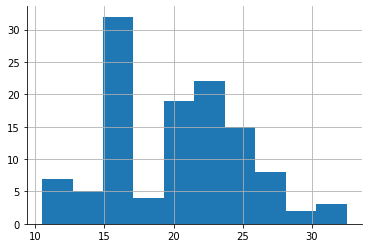

In [108]:
mpg_later.hist()

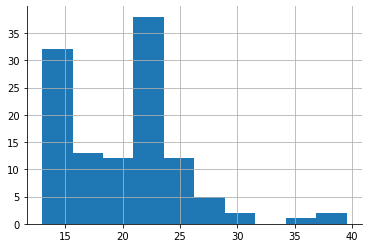

In [59]:
mpg_earlier.hist()

In [60]:
# Are compact cars more fuel-efficient than the average car?

# Visualize first:

In [61]:
small_mpg = mpg[mpg.car_class == 'compact'].average_mpg

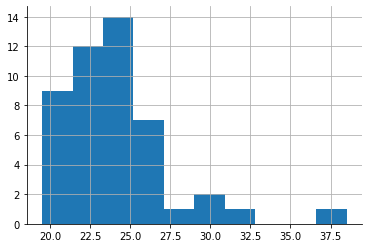

In [62]:
small_mpg.hist()

In [86]:
normal_car_mpg = mpg[mpg.car_class != 'compact'].average_mpg

In [87]:
normal_car_mpg

16     19.5
17     21.0
18     19.5
19     17.0
20     13.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Name: average_mpg, Length: 187, dtype: float64

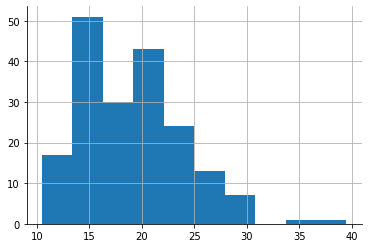

In [88]:
normal_car_mpg.hist()

In [91]:
# Overall average mpg for all car classes.

overall_mpg = round((mpg.average_mpg).mean(),0)

In [104]:
mean = overall_mpg
xbar = small_mpg.mean()

degf = n - 1
standard_error = sd / sqrt(n)

sd = small_mpg.std()
n = small_mpg.shape[0]

t_test_result = (xbar - mean) / (sd / sqrt(n))
t_test_result

# I think I did something wrong here...

8.187585681974102

In [112]:
# Do manual cars get better gas mileage than automatic cars?

# Going to use two-sample test again, since we're comparing two subsets of a population.

In [114]:
mpg.groupby('trans').describe()

displ                                                  year  \
           count      mean       std  min    25%  50%   75%  max count   
trans                                                                    
auto(av)     5.0  2.920000  0.657267  2.0  2.500  3.1  3.50  3.5   5.0   
auto(l3)     2.0  2.100000  0.424264  1.8  1.950  2.1  2.25  2.4   2.0   
auto(l4)    83.0  3.715663  1.318673  1.6  2.500  3.5  5.00  6.5  83.0   
auto(l5)    39.0  3.917949  1.182743  1.8  2.900  4.0  4.70  6.1  39.0   
auto(l6)     6.0  4.633333  0.674290  3.8  4.150  4.6  5.20  5.4   6.0   
auto(s4)     3.0  3.433333  1.616581  2.5  2.500  2.5  3.90  5.3   3.0   
auto(s5)     3.0  3.766667  1.650253  2.4  2.850  3.3  4.45  5.6   3.0   
auto(s6)    16.0  3.412500  1.294540  2.0  2.375  3.3  4.20  6.2  16.0   
manual(m5)  58.0  2.732759  0.907935  1.6  2.000  2.5  3.00  5.2  58.0   
manual(m6)  19.0  3.678947  1.620898  2.0  2.000  3.5  4.70  7.0  19.0   

                         ...    hwy       average_mpg                       \
                   mean  ...    75%   max       count       mean       std   
trans                    ...                                                 
auto(av)    2008.000000  ...  30.00  31.0         5.0  23.900000  2.219234   
auto(l3)    1999.000000  ...  28.50  30.0         2.0  24.000000  4.242641   
auto(l4)    2001.277108  ...  26.00  41.0        83.0  18.951807  4.772006   
auto(l5)    2005.692308  ...  24.50  36.0        39.0  17.717949  4.711122   
auto(l6)    2008.000000  ...  22.00  23.0         6.0  16.833333  2.113449   
auto(s4)    2008.000000  ...  26.00  27.0         3.0  22.166667  1.527525   
auto(s5)    2008.000000  ...  29.00  31.0         3.0  21.333333  5.838093   
auto(s6)    2008.000000  ...  28.25  29.0        16.0  21.281250  3.558880   
manual(m5)  2001.482759  ...  29.00  44.0        58.0  22.775862  5.219878   
manual(m6)  2007.526316  ...  29.00  32.0        19.0  20.552632  4.716681   

                                              
             min     25%   50%     75%   max  
trans                                         
auto(av)    22.0  22.500  22.5  25.500  27.0  
auto(l3)    21.0  22.500  24.0  25.500  27.0  
auto(l4)    12.5  15.000  18.5  22.250  35.0  
auto(l5)    10.5  15.250  16.5  20.000  30.5  
auto(l6)    15.0  15.250  16.0  18.625  19.5  
auto(s4)    20.5  21.500  22.5  23.000  23.5  
auto(s5)    15.0  18.750  22.5  24.500  26.5  
auto(s6)    15.0  19.875  21.5  23.750  25.5  
manual(m5)  13.5  20.500  22.0  25.000  39.5  
manual(m6)  10.5  17.000  21.0  25.000  27.5  

[10 rows x 48 columns]

In [115]:
mpg['is_automatic'] = mpg.trans.str.startswith('a')

In [120]:
automatic_cars = mpg[mpg.is_automatic == True].average_mpg.mean()

In [121]:
manual_cars = mpg[mpg.is_automatic != True].average_mpg.mean()

In [122]:
mpg[mpg.is_automatic != True].average_mpg.mean()

22.227272727272727

In [124]:
alpha = .05

In [126]:
auto_test = stats.ttest_ind(automatic_cars, manual_cars, equal_var = False)
auto_test

Ttest_indResult(statistic=nan, pvalue=nan)

In [127]:
stats.ttest_ind(automatic_cars, manual_cars)

Ttest_indResult(statistic=nan, pvalue=nan)

In [128]:
# I need to remove null values somehow...

In [131]:
stats.ttest_ind(mpg[mpg.is_automatic == True].average_mpg, mpg[mpg.is_automatic != True].average_mpg)

Ttest_indResult(statistic=-4.593437735750014, pvalue=7.154374401145683e-06)

### Telco Churn Data

In [134]:
# Make a boolean mask so I'm only looking at that one specific thing.
# Does the relationship hold, through each unique value of the 3rd variable we're looking at.
# while including z, does x still impact y linearly?
# Accounting for the fluctuations in the 3rd variable, does the relationship between x and y still hold?
# So "controlling for [3rd variable]" simply means I do my tests while grouping by this 3rd variable, whatever that is.

## 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [136]:
x = [1, 2, 3, 4, 5]
corr = [2, 4, 6, 8, 10]

corr, p_value = stats.pearsonr(x, corr)

In [137]:
corr, p_value

(1.0, 0.0)

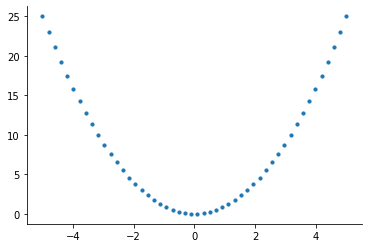

In [140]:
x = np.linspace(-5, 5)
y = x ** 2
plt.scatter(x, y, s=10)

In [142]:
r, p = stats.pearsonr(x, y)
print(r)
print(p)

1.0408340855860843e-16
0.999999999999995


In [147]:
telco = pd.read_csv('cust_churn_telco.csv')

In [148]:
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [155]:
telco.gender == "Female"

0        True
1       False
2       False
3       False
4        True
        ...  
7038    False
7039     True
7040     True
7041    False
7042    False
Name: gender, Length: 7043, dtype: bool

In [157]:
type(telco)

pandas.core.frame.DataFrame

In [189]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [163]:
# Pre-set Values

n = telco.shape[0]

In [173]:
degf = n - 2
conf_interval = .95
alpha_num = 1 - conf_interval

In [174]:
# List my hypotheses:

# 1. Null Hypothesis: There is no linear correlation between monthly charges and tenure.
# 2. Alt Hypothesis: There is a linear correlation between monthly charges and tenure.
# At this point I am not controlling for a 3rd variable.

In [184]:
x_first = telco.tenure
y_first = telco.MonthlyCharges

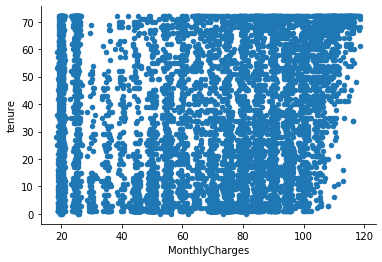

In [185]:
telco.plot.scatter(y= 'tenure', x = 'MonthlyCharges')

In [233]:
r, p = stats.pearsonr(x_first, y_first)
print(r)
print(p)

0.24789985628615005
4.0940449915016345e-99


In [234]:
x = telco.tenure
y = telco.MonthlyCharges

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

0.2478998562861501

In [235]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

21.471666051880597

In [236]:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p

4.0940449914965545e-99

In [237]:
p < alpha_num

True

In [246]:
# p is less than alpha, so we must reject the null hypothesis

In [188]:
# 1. Null Hypothesis: There is no linear correlation between tenure and total charges.
# 2. Alt Hypothesis: There is a linear correlation between tenure and total charges.
# At this point I am not controlling for a 3rd variable.

In [225]:
x_first = telco.tenure
y_second = telco.TotalCharges.fillna(0)

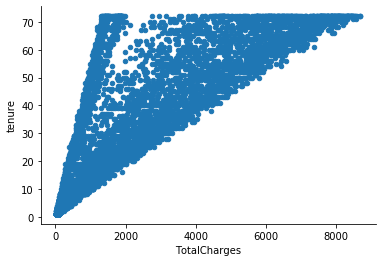

In [226]:
telco.plot.scatter(y= 'tenure', x = 'TotalCharges')

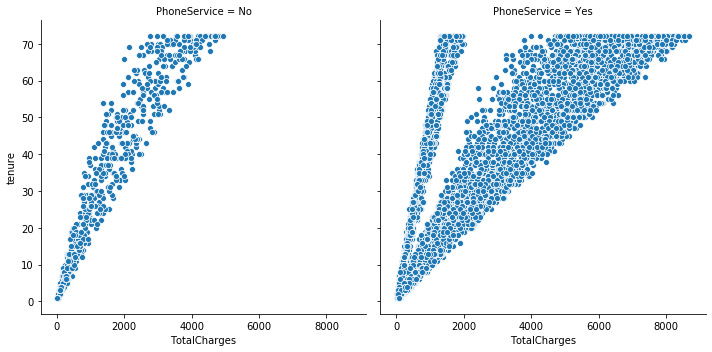

In [227]:
sns.relplot(data = telco, y= 'tenure', x = 'TotalCharges', col = 'PhoneService')

In [231]:
# Appears to be a slightly more linear relationship.

In [232]:
# Looking at correlation:

r_2, p_2 = stats.pearsonr(x_first, y_second)
print(r_2)
print(p_2)

0.826178397950242
0.0


In [242]:
x = telco.tenure
y = telco.TotalCharges

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy_2 = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy_2

0.8247573156351036

In [243]:
# Now find t:

t = (r_xy_2 * sqrt(n - 2)) / sqrt(1 - r_xy_2 ** 2)
t

122.38292909934444

In [244]:
p_2 = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p_2

0.0

In [247]:
p < alpha_num

# We must reject the null hypothesis

True

In [248]:
# Connect to employees database
#defines function to create a sql url using personal credentials
from env import host, user, password

def get_db_url(database, user=user, host=host, password=password): 
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

url = get_db_url('employees')

In [250]:
query = '''
SELECT *
FROM salaries s
WHERE emp_no IN (
    SELECT emp_no FROM dept_emp
    WHERE to_date > NOW()
) AND to_date > NOW()
'''

In [252]:
salaries = pd.read_sql(query, url)

In [254]:
salaries

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [255]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     240124 non-null  int64 
 1   salary     240124 non-null  int64 
 2   from_date  240124 non-null  object
 3   to_date    240124 non-null  object
dtypes: int64(2), object(2)
memory usage: 7.3+ MB


In [256]:
salaries.describe()

,emp_no,salary
count,240124.000000,240124.000000
mean,253080.615365,72012.235857
std,161853.087323,17309.995380
min,10001.000000,38623.000000
25%,84878.750000,59048.750000
50%,249792.500000,69805.000000
75%,424895.250000,82546.000000
max,499999.000000,158220.000000


In [264]:
salaries.shape[0]

240124